# Implementación de K-means en NumPy

## Objetivos
* Generación de datasets para clusterización sintéticos
* Implementación de K-means en NumPy paso a paso

## Datasets Sintéticos - Clustering

El objetivo de éste apartado es generar datos sintéticos sobre los cuales poder ensayar modelos de machine learning de clusterización. En éste caso, vamos a generar datos sintéticos clusterizados A/B en 4 dimensiones.

1. Conformar una matriz con los centroides como fila. Utilizar como ejemplo los centroides:
$C_1 = [1, 0, 0, 0]$ y $C_2 = [0, 1, 0, 0]$

In [92]:
import numpy as np
from matplotlib import pyplot as plt
c = np.array([[1,0,0,0],[0,1,0,0]])

2. Alejar los centroides entre sí mediante la multiplicación por una constante. Esa constante se suele llamar overlap y podemos variarla para ver el rendimiento de nuestros algoritmos de clusterización. Mientras más chica, más difícil será clusterizar.

In [93]:
overlap = 1
centroids = overlap*c
print(centroids)

[[1 0 0 0]
 [0 1 0 0]]


3. Crear $\frac{n}{2}$ muestras de cada centroide. Hint: usar np.repeat.

In [94]:
n=100
data = np.repeat(centroids, n / 2, axis=0)


4. Sumar ruido a cada muestra usando un vector aleatorio normal i.i.d. con media 0 y desvío 1. Hint: usar np.random.normal

In [ ]:
normal_noise = np.random.normal(loc=0, scale=1,size=(n, 4))
data = data + normal_noise

5. Armar un array de longitud n que tenga los labels de nuestro dataset (para cada muestra indicar si pertenece al cluster del centroide 1 o 2). Hint: usar np.repeat.

In [ ]:
labels = np.array([[0],[1]])
labels = np.repeat(labels, n / 2, axis=0)


6. Consolidar los pasos anteriores en una función o clase build_cluster.

In [7]:
def build_cluster(n,overlap):
  centroids = np.array([[1,0,0,0],[0,1,0,0]])*overlap
  data = np.repeat(centroids, n / 2, axis=0)
  normal_noise = np.random.normal(loc=0, scale=1,size=(n, 4))
  data = data + normal_noise
  labels = np.array([[0],[1]])
  labels = np.repeat(labels, n / 2, axis=0)
  return data,labels

---

## Implementación de K-means

1. Dada una nube de puntos $X \in \mathbb{R}^{NxD}$ y centroides $C \in \mathbb{R}^{KxD} $, armar una función que permita obtener la distancia entre cada vector de $X$ y cada uno de los centroides, utilizando operaciones vectorizadas y broadcasting en NumPy. Utilizar como valores de referencia:

$X=\begin{bmatrix}1 & 2 & 3\\4 & 5 & 6\\7 & 8 & 9\end{bmatrix}$ , $C=\begin{bmatrix}1 & 0 & 0\\0 & 1 & 1\end{bmatrix}$ 

Guiarse con el esquema de broadcasting inferior. Comparar los resultados obtenidos con la función cdist de SciPy.

![Clase%201%20-%20K-means%201.png](attachment:Clase%201%20-%20K-means%201.png)

In [45]:
from scipy import spatial
x = np.arange(1,10).reshape((3,3))
c = np.array([[1,0,0],[0,1,1]])
print(x)
C = c[:,None]
c_=C-x
dist = np.sqrt(np.sum(np.power(c_,2),axis=2))
dist_2 = spatial.distance.cdist(x,c)
print(dist)
print(dist_2)



[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 3.60555128  8.36660027 13.45362405]
 [ 2.44948974  7.54983444 12.72792206]]
[[ 3.60555128  2.44948974]
 [ 8.36660027  7.54983444]
 [13.45362405 12.72792206]]


In [46]:
from matplotlib import cm
import numpy as np
from matplotlib import pyplot as plt

def dist(nube,centroides):
  x = np.array(nube)
  c = np.array(centroides)
  diff = c[:,None]
  diff = diff-x
  dist = np.sqrt(np.sum(diff*diff,axis = 2))
  return dist.T

dist(x,c)




array([[ 3.60555128,  2.44948974],
       [ 8.36660027,  7.54983444],
       [13.45362405, 12.72792206]])

2. Obtener para cada fila de $X$, el índice de la fila de $C$ con distancia euclídea más pequeña. Es decir, decir para cada fila de $X$ indicar a qué cluster pertenece en C. Hint: utilizar np.argmin.


In [47]:
c_index = np.argmin(dist,axis=0)
c_index

def cluster(dist):
  return np.argmin(dist, axis=0)

3. Implementar la función def k_means(X, n) de manera tal que al finalizar, devuelva la posición de los centroides y un array que indique a qué cluster pertenece cada fila de X. Seguir los siguientes pasos:

    * El usuario indica la cantidad de clusters a crear $k$.
    * Se seleccionan $k$ elementos aleatorios de $X$ como posiciones iniciales del los centroides $C$. Hint: usar np.random.
    * Se calcula la distancia entre todos los puntos en $X$ y todos los centroides en $C$. Usar función del ejercicio 1.
    * Para cada punto de $X$ se selecciona el centroide más cercano de $C$. Usar función del ejercicio 2.
    * Recalcular los centroides $C$ a partir de la media de las filas de $X$ que pertenecen a cada centroide. Verificar que axis se va a utilizar en np.mean. Se puede usar un for para iterar sobre la cantidad de clusters $k$.
    * Iterar entre el tercer y quinto punto una cantidad fija de veces MAX_ITER o hasta que la posición de los centroides no cambie entre iteración e iteración fijada una cierta tolerancia.



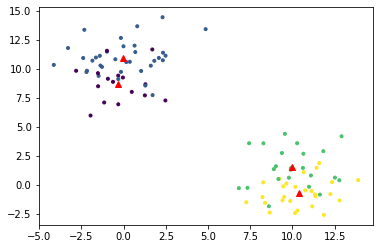

In [88]:
def k_means(X,k,MAX_ITER, tol=1e-7, figure=False):
  cant_netroides = k

  cent_index_all = np.arange(0,len(X))
  np.random.shuffle(cent_index_all)
  cent_index = cent_index_all[0:cant_netroides]
  centroides = X[cent_index]


  for l in range(MAX_ITER):
    index_min_dist = cluster(dist(X,centroides).T)
    target = np.zeros(shape=(len(X),len(centroides),np.shape(X)[1]))
    target[[range(len(target))],[index_min_dist]] = X[range(len(target))]
    centroides_aux = np.average(target,axis=0,weights=np.logical_and(target,target) )
    if np.max(np.abs(centroides-centroides_aux)) <= tol:
      break
    else:
      centroides = centroides_aux

  if figure:
    plt.figure()
    c = cm.get_cmap('viridis', 8)
    plt.scatter(X[:,0],X[:,1], marker = '.',c=c(index_min_dist/np.max(index_min_dist)))
    plt.plot(centroides[:,0],centroides[:,1],'r^')
    plt.show()


k = 4

k_means(data,k,200,figure=True)